In [1]:
import os
import json
import numpy as np
import pandas as pd
import seaborn as sns
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.applications.densenet import DenseNet121, preprocess_input
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.applications.resnet_v2 import ResNet101V2, preprocess_input
from keras.layers import GlobalAveragePooling2D, Dropout, Dense
from sklearn.preprocessing import LabelEncoder
from PIL import Image
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras import layers, models
from keras.models import Model
import tensorflow as tf

Train / Test / Validation Paths

In [2]:
train_dataset_path = "dataset/train"
test_dataset_path = "dataset/test"
validation_dataset_path = "dataset/val"

In [10]:
# Set the parameters for training
image_size = (224, 224)
batch_size = 16

List of classes 

In [11]:
# Get the list of class names from the training dataset
disease_categories = sorted(os.listdir(train_dataset_path))

# Initialize the label encoder
label_encoder = LabelEncoder()

# Create an image data generator
data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

Generators for loading images

In [12]:
# Create a generator for loading the training data
train_generator = data_generator.flow_from_directory(
    train_dataset_path,  # Path to the training dataset
    target_size = image_size,
    batch_size = batch_size,
    class_mode='categorical',
    shuffle=True
)

Found 248 images belonging to 3 classes.


In [13]:
# Create a generator for loading the testing data
test_generator = data_generator.flow_from_directory(
    test_dataset_path,  # Path to the testing dataset
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # No need to shuffle the testing data
)


Found 30 images belonging to 3 classes.


In [14]:
# Create a generator for loading the validation data
validation_generator = data_generator.flow_from_directory(
    validation_dataset_path,  # Path to the validation dataset folder
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # No need to shuffle the validation data
)

Found 31 images belonging to 3 classes.


In [15]:
# Get the label mappings from the generator
label_mappings = train_generator.class_indices

# Convert the label mappings to integer labels
integer_labels = label_encoder.fit_transform(list(label_mappings.keys()))

Densenet121

In [16]:
# Load the DenseNet121 pre-trained model without the top layer
base_model = DenseNet121(include_top=False, weights="imagenet", input_shape=(224, 224, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Build the model architecture
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)  # Use the output of the last convolutional layer
x = layers.Dropout(0.5)(x)  # Adding a dropout layer
x = layers.Dense(len(disease_categories), activation="softmax")(x)

model = models.Model(inputs=base_model.input, outputs=x)

# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [17]:
# Fit the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    epochs=25,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32
)

Epoch 1/25
7/7 [==============================] - 24s 2s/step - loss: 1.9508 - accuracy: 0.3214
Epoch 2/25
7/7 [==============================] - 13s 2s/step - loss: 1.4797 - accuracy: 0.4327
Epoch 3/25
7/7 [==============================] - 10s 1s/step - loss: 0.8036 - accuracy: 0.6538
Epoch 4/25
7/7 [==============================] - 11s 2s/step - loss: 0.7008 - accuracy: 0.6923
Epoch 5/25
7/7 [==============================] - 11s 2s/step - loss: 0.6173 - accuracy: 0.7885
Epoch 6/25
7/7 [==============================] - 13s 2s/step - loss: 0.4845 - accuracy: 0.8482
Epoch 7/25
7/7 [==============================] - 13s 2s/step - loss: 0.5032 - accuracy: 0.8125
Epoch 8/25
7/7 [==============================] - 13s 2s/step - loss: 0.4031 - accuracy: 0.8482
Epoch 9/25
7/7 [==============================] - 11s 2s/step - loss: 0.3400 - accuracy: 0.8942
Epoch 10/25
7/7 [==============================] - 12s 2s/step - loss: 0.2518 - accuracy: 0.9135
Epoch 11/25
7/7 [======================

In [18]:
history_dict = history.history
with open('DenseNet_history.json', 'w') as f:
    json.dump(history_dict, f)
print('history saved successfully!')

history saved successfully!


In [19]:
# Save the trained model
model.save('densenet121_model.h5')
print("Model saved successfully!")

Model saved successfully!


In [22]:
# Load the ResNet101 pre-trained model without the top layer
base_model = ResNet101V2(include_top=False, weights="imagenet", input_shape=(224, 224, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Build the model architecture
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)  # Use the output of the last convolutional layer
x = layers.Dropout(0.5)(x)  # Adding a dropout layer
x = layers.Dense(len(disease_categories), activation="softmax")(x)

model = models.Model(inputs=base_model.input, outputs=x)

# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [23]:
# Fit the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    epochs=25,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32
)

Epoch 1/25
7/7 [==============================] - 20s 2s/step - loss: 2.0407 - accuracy: 0.3393
Epoch 2/25
7/7 [==============================] - 12s 2s/step - loss: 0.8654 - accuracy: 0.6923
Epoch 3/25
7/7 [==============================] - 12s 2s/step - loss: 0.4045 - accuracy: 0.8393
Epoch 4/25
7/7 [==============================] - 12s 2s/step - loss: 0.2956 - accuracy: 0.9231
Epoch 5/25
7/7 [==============================] - 12s 2s/step - loss: 0.1121 - accuracy: 0.9615
Epoch 6/25
7/7 [==============================] - 10s 2s/step - loss: 0.2420 - accuracy: 0.9038
Epoch 7/25
7/7 [==============================] - 13s 2s/step - loss: 0.1369 - accuracy: 0.9519
Epoch 8/25
7/7 [==============================] - 11s 2s/step - loss: 0.1355 - accuracy: 0.9712
Epoch 9/25
7/7 [==============================] - 13s 2s/step - loss: 0.0910 - accuracy: 0.9643
Epoch 10/25
7/7 [==============================] - 14s 2s/step - loss: 0.0434 - accuracy: 1.0000
Epoch 11/25
7/7 [======================

In [24]:
history_dict = history.history
with open('restNet_history.json', 'w') as f:
    json.dump(history_dict, f)
print('history saved successfully!')

history saved successfully!


In [25]:
# Save the trained model
model.save('resNet_model.h5')

print("Model saved successfully!")

Model saved successfully!


VGG16

In [26]:
#Load the VGG16 pre-trained model without the top layer
base_model = VGG16(include_top=False, weights="imagenet", input_shape=(224, 224, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Build the model architecture
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Use the output of the last convolutional layer
x = Dropout(0.5)(x)  # Adding a dropout layer
x = Dense(len(disease_categories), activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=x)

# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [27]:
# Fit the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    epochs=25,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32
)

Epoch 1/25
7/7 [==============================] - 18s 2s/step - loss: 1.3979 - accuracy: 0.2768
Epoch 2/25
7/7 [==============================] - 12s 2s/step - loss: 1.4213 - accuracy: 0.3482
Epoch 3/25
7/7 [==============================] - 11s 1s/step - loss: 1.3096 - accuracy: 0.3462
Epoch 4/25
7/7 [==============================] - 12s 2s/step - loss: 1.1792 - accuracy: 0.3571
Epoch 5/25
7/7 [==============================] - 12s 2s/step - loss: 1.1889 - accuracy: 0.3839
Epoch 6/25
7/7 [==============================] - 13s 2s/step - loss: 1.0236 - accuracy: 0.5268
Epoch 7/25
7/7 [==============================] - 13s 2s/step - loss: 1.0411 - accuracy: 0.4904
Epoch 8/25
7/7 [==============================] - 13s 2s/step - loss: 0.9995 - accuracy: 0.5089
Epoch 9/25
7/7 [==============================] - 13s 2s/step - loss: 1.0314 - accuracy: 0.4464
Epoch 10/25
7/7 [==============================] - 12s 2s/step - loss: 1.0576 - accuracy: 0.4231
Epoch 11/25
7/7 [======================

In [28]:
history_dict = history.history
with open('VGG16_history.json', 'w') as f:
    json.dump(history_dict, f)
print('history saved successfully!')

history saved successfully!


In [29]:
# Save the trained model
model.save('VGG16_model.h5')

print("Model saved successfully!")

Model saved successfully!


In [30]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

# Make predictions on the test set
predictions = model.predict(test_generator)
predicted_classes = tf.argmax(predictions, axis=1)

# Get the true labels
true_classes = test_generator.classes

2/2 [==============================] - 6s 4s/step - loss: 0.6843 - accuracy: 0.8333
Test Accuracy: 83.33%
Test Loss: 0.6843
2/2 [==============================] - 4s 2s/step


              precision    recall  f1-score   support

        cats       0.82      0.90      0.86        10
        dogs       0.80      0.80      0.80        10
       foxes       0.89      0.80      0.84        10

    accuracy                           0.83        30
   macro avg       0.84      0.83      0.83        30
weighted avg       0.84      0.83      0.83        30



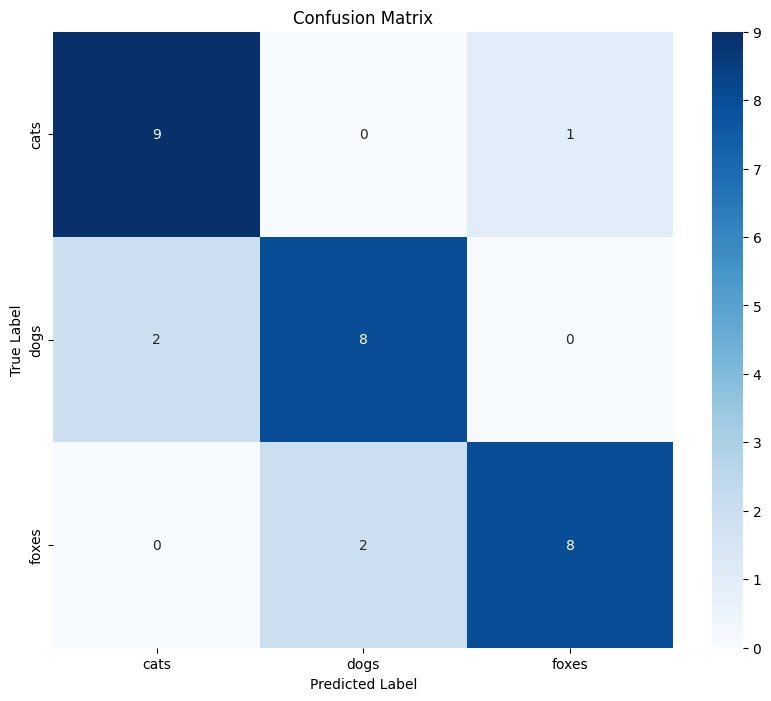

<Figure size 640x480 with 0 Axes>

In [34]:

# Classification report
from sklearn.metrics import classification_report

report = classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices.keys())
print(report)

# Confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Save as an image
plt.savefig('confusion_matrix.png')
plt.show()